In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv("Advertising.csv",index_col=False)

In [54]:
# dropping the column by index values
df.drop(df.columns[[0]],inplace=True,axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


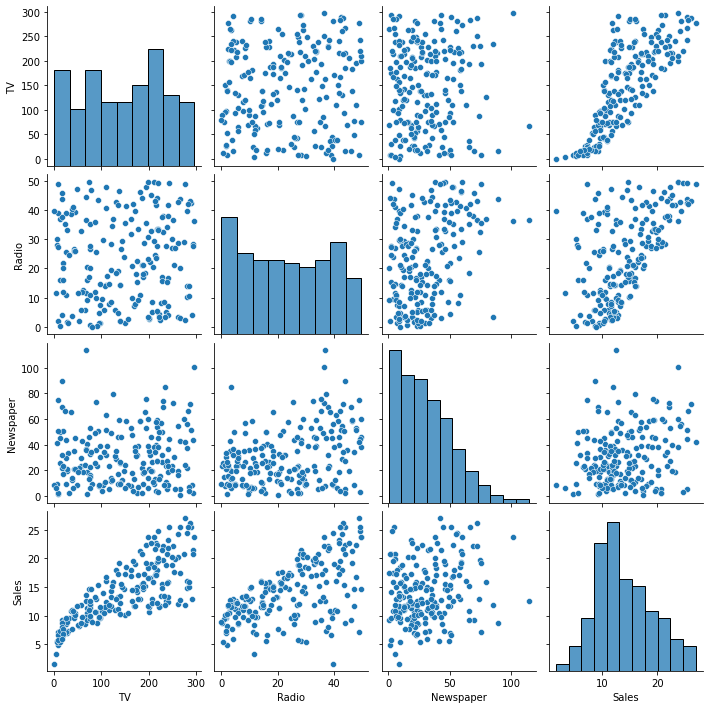

In [55]:
sns.pairplot(df)

In [56]:
X=df.drop("Sales",axis=1)

In [57]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [58]:
Y=df["Sales"]

In [59]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=42)

In [68]:
len(df)

200

In [69]:
len(X_train),len(X_test)

(140, 60)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model=LinearRegression()

In [78]:
model.fit(X_train,Y_train)

LinearRegression()

In [87]:
x_predict=model.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [88]:
mean_absolute_error(Y_test,x_predict)

1.5116692224549084

In [89]:
mean_absolute_error(Y_test,x_predict)

1.5116692224549084

In [90]:
mean_squared_error(Y_test,x_predict)

3.79679723671522

In [91]:
np.sqrt(mean_squared_error(Y_test,x_predict))

1.9485372043446387

In [95]:
test_residuals=Y_test-x_predict

In [96]:
test_residuals

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: Sales, dtype: float64

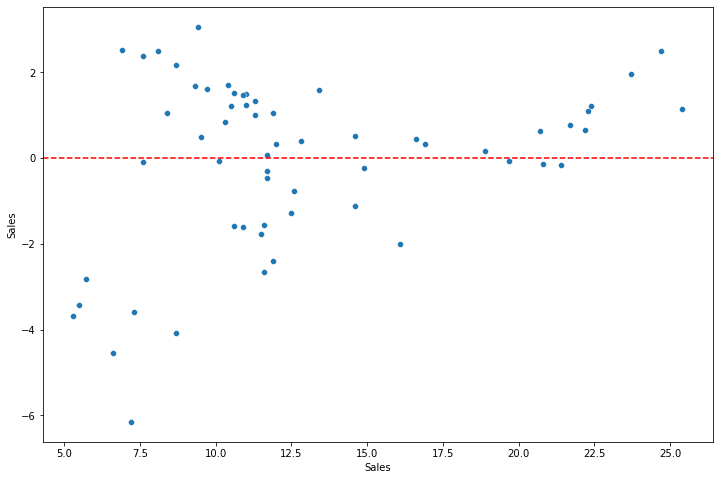

In [107]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=Y_test,y=test_residuals)
plt.axhline(y=0,color="red",ls="--")
# The plots are random and does not have any pattern of line or curve hence this dataset is valid for linear regression

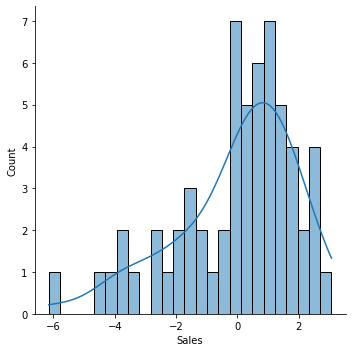

In [108]:
sns.displot(test_residuals,bins=25,kde=True)
# The distribution of residuals is normally distributed around zero and very close to mean this also proves
# This particular dataset is suitable for linear regression

In [109]:
import scipy as sp


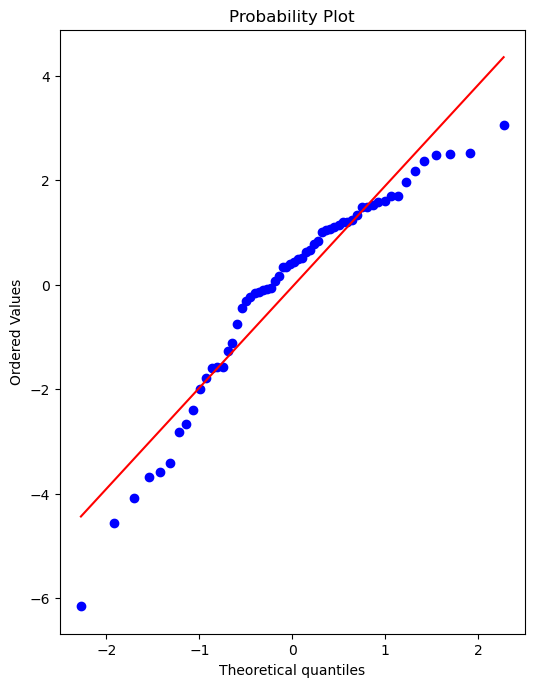

In [111]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)
_=sp.stats.probplot(test_residuals,plot=ax)

In [113]:
final_model=LinearRegression()

In [114]:
final_model.fit(X,Y)

LinearRegression()

In [115]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [116]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [117]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [118]:
y_hat=final_model.predict(X)

In [119]:
from joblib import dump,load

In [121]:
dump(final_model,"final_sales_model.joblib")

['final_sales_model.joblib']

In [122]:
loaded_model=load("final_sales_model.joblib")

In [ ]:
loaded_model